## 딥러닝 MNIST (텐서플로 1.x)

- 374 ~393

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# mnist 압축 파일 다운
# 이미지 리드할 객체 생성
mnist = input_data.read_data_sets('./mnist/data/',one_hot = True)

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
# cost가 0으로 빨리 수렴하는데 적절한 w,b 
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# 1차 예측 
# weight
w0 = tf.Variable(initializer([784,200]))

# bias
b0 = tf.Variable(initializer([200]))

# 2차 예측 
# weight
w1 = tf.Variable(initializer([200,10]))

# bias
b1 = tf.Variable(initializer([10]))


In [ ]:
print("데이터 개수 : ",mnist.train.num_examples)

데이터 개수 :  55000


In [ ]:
batch_size = 100

total_batch = int(mnist.train.num_examples/batch_size)

print("total_batch =", total_batch)

total_batch = 550


In [ ]:
optimizer = tf.train.AdamOptimizer(0.001)

In [ ]:
for step in range(11):
  total_cost = 0

  for i in range(total_batch):


    X, y = mnist.train.next_batch(batch_size)
    with tf.GradientTape() as tape:
    
        hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)

        hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

        cost = -tf.reduce_mean(y*tf.log(hypothesis1))

        grads = tape.gradient(cost, [w0, w1, b0, b1])

    optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1,b0, b1]))

    total_cost += cost
  print("step: {}, cost:{}". format(step, total_cost/total_batch))

step: 0, cost:0.007736366242170334
step: 1, cost:0.006828421726822853
step: 2, cost:0.00588814215734601
step: 3, cost:0.005277530290186405
step: 4, cost:0.004499008879065514
step: 5, cost:0.004073257092386484
step: 6, cost:0.0034871597308665514
step: 7, cost:0.003060414921492338
step: 8, cost:0.0026792718563228846
step: 9, cost:0.002253956161439419
step: 10, cost:0.002043391577899456


In [ ]:
test_images =  mnist.test.images

test_labels = mnist.test.labels

hypothesis0 = tf.sigmoid(tf.matmul(test_images,w0)+b0)

predict = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

# 각 줄에서 최대값의 인덱스 리턴
predict01 = tf.argmax(predict, 1)

# 정답 셋에서 각 줄의 최댓값 인덱스 리턴
target = tf.argmax(test_labels, 1)

ac01 = tf.equal(predict01, target)


ac02 = tf.cast(ac01, dtype = 'float32')

ac03 = tf.reduce_mean(ac02)

print("정확도 : ",ac03)

정확도 :  tf.Tensor(0.9791, shape=(), dtype=float32)


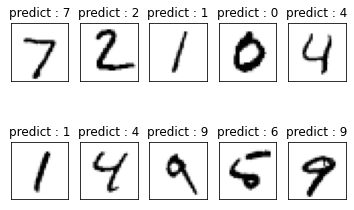

In [ ]:
fig = plt.figure()

for i in range(10):

  subplot = fig.add_subplot(2,5, i+1)

  # X축에 아무 데이터도 출력 안하기
  subplot.set_xticks([])

  # y축에 아무 데이터도 출력 안하기
  subplot.set_yticks([])

  # 이미지의 제목으로 예측한 이미지의 이름 출력
  subplot.set_title('predict : %d' % predict01[i])

  # 이미지 출력
  subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                 cmap ='Greys')
plt.show()

## 